<font size="5"><center>Tópicos selectos de ciencia de datos<center><font>
<font size="4"><center>Tarea 1<center>
<font size="4"><center>Iván Vega Gutiérrez<center>
<center>8 de septiembre de 2022<center>

1. ¿Qué es Batch normalization? Escribe un reporte breve explicando qué es, para qué sirve y cómo se realiza. Incluye ejemplos ilustrativos (sencillos).

**Solución de 1**

Normalización por lotes (batch normalization) es una técnica de regularización , propuesta en 2015 por dos investigadores de Google, Sergey Ioffe y Christian Szegedy, que dichas con las propias palabras de sus autores : "proporciona un mecanismo de reparametrización adaptativa para facilitar el entrenamiento de redes profundas".

El objetivo es evitar que el entrenamiento de la red se ralentice debido a las diferencias que surgen entre las diferentes capas de una red con múltiples capas ocultas, algo a lo que Ioffe y Szegedy denominan “variación covariable interna” (internal covariance shift), de hecho, la técnica de batch normalization se presentó como una solución para reducir este término. La normalización por lotes consiste en normalizar las entradas de cada capa. En lugar de normalizar sólo las entradas de la red, la normalización por lotes se aplica en toda la red. Se puede interpretar como un mecanismo de preprocesamiento de los datos de entrada de cada capa de la red.

Para cada minilote, estimamos la media $\mu$ y la varianza $\sigma ^2$ de cada uno de los parámetros que nos interesen. A continuación, nor- malizamos usando z-scores. Por ejemplo, dados los niveles de activación $h$ de una neurona oculta para un minilote de $m$ ejemplos, su versión normalizada por lotes, $h_{bn}$, se calcula como $$\mu = \frac{1}{m} \sum_{i=1}^m h_{i} $$ $$\sigma ^2 = \frac{1}{m} \sum_{i=1}^m (h_{i} - \mu )^2$$ $$ h_{bn} = \frac{h - \mu}{\sqrt{\sigma ^2 + \epsilon}} $$

para $\epsilon$ pequeño. Una vez entrenada la red, los valores de $\mu$ y $\sigma$ pueden reemplazarse por medidas recogidas durante el proceso de entrenamiento para utilizar la red con nuevos datos de entrada.

Esta normalización, tal cual, podría afectar al comportamiento de la red. Por ejemplo, si normalizamos así las entradas de una neurona sigmoidal, puede que estemos obligando a que opere en su régimen lineal. Por este motivo, a la normalización anterior se le suele añadir una transformación lineal $\gamma h_{bn} + \beta$ que garantice que se puede representar la función identidad. El resultado de esta transformación es $BN_{\gamma, \beta} (h) = \gamma h_{bn} + \beta $, donde $\gamma$ y $\beta$ se aprenden como cualquier otro parámetro de la red, al ser la normalización una sencilla operación diferenciable. Es decir, la normalización por lotes preprocesa los datos con los que se trabaja en toda la red pero, en lugar de diseñar mecanismos específicos para ello, este preprocesamiento se integra en el propio algoritmo de entrenamiento de la red, basado en ajustar sus parámetros de acuerdo al gradiente del error.

La estandarización estabiliza el comportamiento del algoritmo de entrenamiento de la red, sin impedir el aprendizaje ni eliminar artificialmente el comportamiento no lineal de la red.

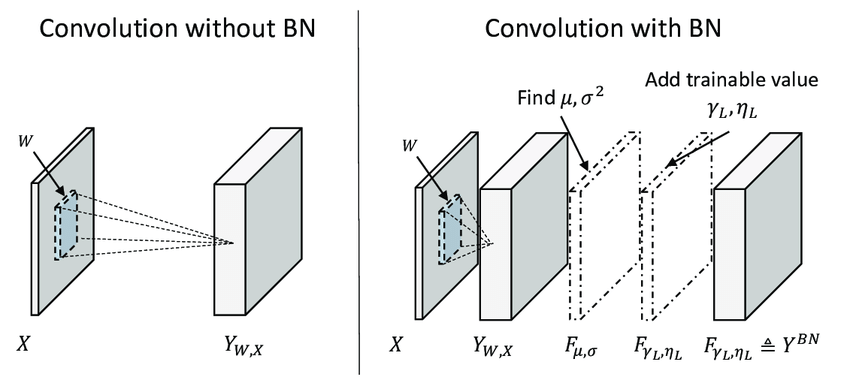

In [ ]:
import IPython.display as ipd
ipd.Image("batch_normalization.png", width=600)

Las principales ventajas de usar batch normalization son:
- Las redes entrenan más rápido.
- Permite usar tasas de aprendizaje más altas.
- Falicita la inicialización de los pesos.
- Hace viable el uso de más funciones de activación.
- Simplifica la creación de redes más profundas.

La normalización por lotes, en definitiva, es muy sencilla de implementar y soluciona muchos de los problemas que nos obligaban a diseñar estrategias sofisticadas de inicialización de los parámetros de la red y de ajuste local de sus tasas de aprendizaje. En problemas reales, como en el reconocimiento de objetos en imágenes usando redes convolucionales, ha demostrado ser mucho más eficiente que otras alternativas. Hace a la red más robusta frente a problemas en la inicialización de sus parámetros y, además, suele tener un efecto regularizador sobre la red una vez entrenada; esto es, mejora su capacidad de generalización.

2. Considera un conjunto de $n$ datos de entrenamiento $\left\lbrace \mathbf{x}_i, y_i\right\rbrace_{i=1}^n$, con $\mathbf{x}_i\in \mathcal{R}^d$ y $y_i\in \mathcal{R}$. Ahora, considera ajustar un modelo lineal $\hat{y}_i=\mathbf{w}^{*'}\mathbf{x}_i$, donde $\mathbf{w}^{*}=(w_1,\ldots,w_d)'$ es el vector de pesos. Supon que ajustas el modelo minimizando una función de costo apropiada (como MSE) con algún método de optimización (por ejemplo, descenso por gradiente usando Batch). ¿Qué condiciones debe tener la matriz de datos $\mathbf{X}$ para que exista una solución única $\mathbf{w}^{*}$?


**Solución de 2**

Nuestro objetivo es que el sistema $$\hat{y} = X w^{*}$$ tenga una única solución $w^{*}.$ Notemos que si $X$ es una matriz cuadrada la condición que debería de cumplir $X$ es que sea invertible, o bien, que $\hat{y} \notin rang(X)$, sin embargo, suponiendo que $X$ no es cuadrada recurrimos a la generalización de que se satisfaga la ecuación normal.

En este caso, tenemos que $w^{*} \in \mathbb{R}^{d}$ es una solución al problema de mínimos cuadrados si y solo si $$X´X w^{*} = X´\hat{y}$$ La ecuación anterior es la ecuación normal. Notemos que $X´ X$  es una matriz cuadrada de orden $d$, si $X´X$ es invertible  entonces podemos escribir la ecuación normal como $$ w^{*} = (X´X)^{-1} X´ \hat{y},$$ por lo tanto hallamos una solución $w^{*}$ a nuestro problema inicial. Para la unicidad se tiene el siguiente teorema.

**Teorema:** Sea $A \in M_{n,p} (\mathbb{R})$ existe siempre una solución a la ecuación normal, además esa solución es única si y solo si $Ker(A) = {0}$


3. Considera las redes multicapa (con funciones de activación lineal) que se muestran en la siguiente figura:

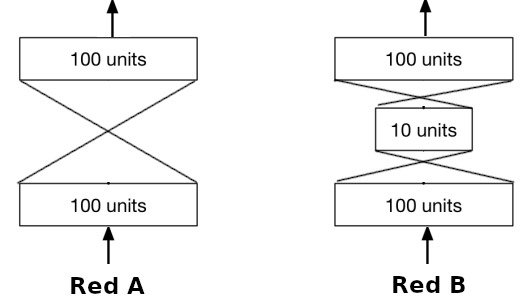

In [ ]:
ipd.Image("redes_t1.png", width=500)

    a) - Describe una ventaja (al menos) de la red A sobre la red B

    b) - Describe una ventaja (al menos) de la red B sobre la red A

**Solución de 3 a)**

- Menor costo computacional :  El tiempo de entrenamiento es menor.
- Más simple : Por la arquitectura que tiene, es más fácil de entender y programar.
- Menor cantidad de parámetros :  Lo que se traduce en necesitar una menor cantidad de datos de entrada.
- Menos propensa a caer en el sobreajuste.

**Solución de 3 b)**

- Mayor flexibilidad: Se puede aplicar a problemas más complejos (problemas no lineales).
- Trabaja bien con una gran cantidad de datos de entrada.
- Mantiene una buena precisión para muestras grandes y pequeñas.

4. Considera los datos de dígitos MNIST.

    a) Usando Pytorch, implementa un baseline basado en regresión logística (multiclase) para la clasificación de dígitos. Reporta su desempeño con las métricas que creas conveniente.

    b) Nuevamente, usando Pytorch, implementa redes neuronales con 1, 2 y 3 capas ocultas. ¿Qué mejoras obtienes en cada caso respecto al baseline? Reporta todos tus hallazgos y los parámetros que uses, incluyendo el número de unidades ocultas en la capa, el optimizador (uno solo para todos los modelos), el número de datos de entrenamiento, validación, batch, etcétera.


### Datos

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
args={}
kwargs={}
# puedes poner éstos parámetros por separado, y cambiarles su valor...
args['batch_size']=1000
args['test_batch_size']=1000

In [ ]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)

Exploramos cuantos datos tenemos

In [ ]:
y_train = train_loader.dataset.targets
x_train = train_loader.dataset.data
y_test = test_loader.dataset.targets
x_test = test_loader.dataset.data
#print(y_train.shape)
#print(y_test.shape)
print(x_train.shape)
print(x_test.shape)
#print(x_test[0])
#print(y_test[0])

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


Visualicemos los datos de prueba con sus respectivas etiquetas.

Label: 3


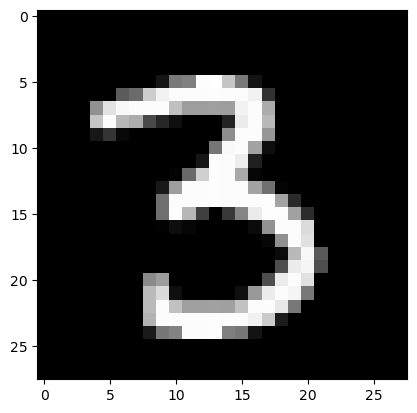

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
n = np.random.randint(len(y_test))
print("Label: {}".format(y_test[n]))
plt.imshow(x_test[n], cmap='gray', interpolation='none')

Tenemos 60,000 datos para entrenamiento y 10,000 datos para prueba, donde cada dato es una imagen de 28 por 28 píxeles, por lo tanto la entrada para nuestra red neuronal serán vectores de dimension 784=28x28

In [ ]:
len(torch.flatten(x_test[0]))

784

**Solución de 4 a)**

In [ ]:
#Inicializamos nuestros parámetors
input_size = 784
num_classes = 10
num_epochs = 10
learning_rate = 0.001
# Arquitectura del modelo
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self, x):
        out = self.linear(x)
        return out
# Inicializamos el modelo
model = LogisticRegression(input_size, num_classes)
# Definimos la funcion de perdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# Entrenamiento del modelo
iter=0
for epoch in range(num_epochs):
    loss=0
    for i,(images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        if iter % 70 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, 28*28).requires_grad_()
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print('Epoch: {}, Iteracion: {}, Loss: {}m Accuracy: {}'.format(epoch, iter, loss.item(), accuracy))

Epoch: 1, Iteracion: 70, Loss: 1.8081982135772705m Accuracy: 47.29999923706055
Epoch: 2, Iteracion: 140, Loss: 1.41695237159729m Accuracy: 66.0199966430664
Epoch: 3, Iteracion: 210, Loss: 1.1669096946716309m Accuracy: 73.80999755859375
Epoch: 4, Iteracion: 280, Loss: 1.0515400171279907m Accuracy: 77.94000244140625
Epoch: 5, Iteracion: 350, Loss: 0.9353123307228088m Accuracy: 80.05999755859375
Epoch: 6, Iteracion: 420, Loss: 0.870211124420166m Accuracy: 81.66999816894531
Epoch: 8, Iteracion: 490, Loss: 0.8057219982147217m Accuracy: 82.62999725341797
Epoch: 9, Iteracion: 560, Loss: 0.7239288687705994m Accuracy: 83.44999694824219


**Solución de 4 b)**

Para este ejercicio utilizaremos los mismos parámetros para las tres redes neuronales. La medida del batch que se utilizó fue de mil. El optimizador que vamos a utilizar es el descenso de gradiente estocático, la tasa de aprendizaje será de 0.01, el número de batches será de 256, y el número de unidades en cada capa oculta será de mil y utilizaremos 20 epocas.

In [ ]:
import pandas as pd
input_features = 784
output_features = 10
learning_rate = 1e-2
num_epochs = 10
hidden_1 = 1000
hidden_2 = 1000
hidden_3 = 1000

**Arquitectura de nuestras redes neuronales**

In [ ]:
# Modelo 1
model_1= nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=input_features, out_features= hidden_1),
    nn.ReLU(),
    nn.Linear(in_features = hidden_1, out_features = output_features))
# Modelo 2
model_2= nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=input_features, out_features= hidden_1),
    nn.ReLU(),
    nn.Linear(in_features=hidden_1, out_features= hidden_2),
    nn.ReLU(),
    nn.Linear(in_features = hidden_2, out_features = output_features))
# Modelo 3
model_3= nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=input_features, out_features= hidden_1),
    nn.ReLU(),
    nn.Linear(in_features=hidden_1, out_features= hidden_2),
    nn.ReLU(),
    nn.Linear(in_features=hidden_2, out_features= hidden_3),
    nn.ReLU(),
    nn.Linear(in_features = hidden_3, out_features = output_features))

**Eentrenamiento del modelo**

In [ ]:
def train(n_epochs, model, learning_rate):
    # Definimos nuestro optimizador
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    # Inicializamos las perdidas
    historico = pd.DataFrame()
    # Entrenamiento del modelo
    for epoch in range(n_epochs):
        loss = 0
        for i, (x,y) in enumerate(train_loader):
            model.train()
            # Calculamos los scores comparanado las predicciones
            scores = model(x)
            cost = F.cross_entropy(input=scores, target=y)
            # Reseteamos el gradiente
            optimizer.zero_grad()
            cost.backward()
            # Actualizamos los parametros
            optimizer.step()
            # Guardamos la pérdida
            loss += cost.item()
        # Calculamos la precisión de nuestro modelo
        num_correct = 0
        num_total = 0
        with torch.no_grad():
            for x, y in test_loader:
                scores = model(x)
                _, pred = scores.max(1)
                num_correct += (pred==y).sum()
                num_total += pred.size(0)
            accuracy = float(num_correct)/num_total
        df = pd.DataFrame(data={
            'Epoch':epoch,
            'Loss':cost.item(),
            'Accuracy':accuracy
            },index=[0])
        historico = pd.concat(objs=[historico, df],ignore_index=True,sort=False)
        #accuracy = compute_acc(test_loader, model, True)
        print("Epoch: %d, Loss: %f , Accuracy : %f" % (epoch+1, float(cost.item()), accuracy))
    return historico

**Gráficas de loss y accuracy**

In [ ]:
def plot_loss(dataframe,number):
    plt.figure(figsize=(3,3))
    plt.plot(dataframe['Epoch'],dataframe['Loss'],label='Loss')
    plt.title("Loss de " + " red neuronal " + number)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()


In [ ]:
def plot_acc(dataframe,number):
    plt.figure(figsize=(3,3))
    plt.plot(dataframe['Epoch'],dataframe['Accuracy'],label='Accuracy')
    plt.title("Accuracy de " + " red neuronal " + number)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.show()

### Resultados

**Red neuronal con una capa oculta**

In [ ]:
red_1 = train(num_epochs, model_1, learning_rate)

Epoch: 1, Loss: 1.166244 , Accuracy : 0.809800
Epoch: 2, Loss: 0.773018 , Accuracy : 0.854000
Epoch: 3, Loss: 0.649970 , Accuracy : 0.870900
Epoch: 4, Loss: 0.467187 , Accuracy : 0.879900
Epoch: 5, Loss: 0.447103 , Accuracy : 0.887500
Epoch: 6, Loss: 0.409663 , Accuracy : 0.893000
Epoch: 7, Loss: 0.416122 , Accuracy : 0.897300
Epoch: 8, Loss: 0.391438 , Accuracy : 0.900300
Epoch: 9, Loss: 0.371328 , Accuracy : 0.904300
Epoch: 10, Loss: 0.404752 , Accuracy : 0.905000


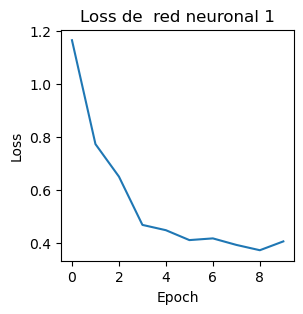

In [ ]:
plot_loss(red_1,"1")

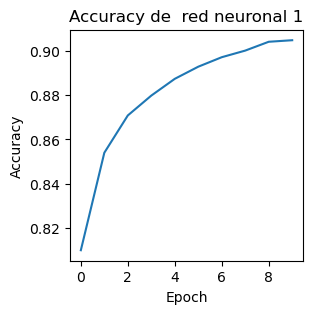

In [ ]:
plot_acc(red_1,"1")

**Red neuronal con dos capas ocultas**

In [ ]:
red_2 = train(num_epochs, model_2, learning_rate)

Epoch: 1, Loss: 1.927401 , Accuracy : 0.711900
Epoch: 2, Loss: 1.323912 , Accuracy : 0.779900
Epoch: 3, Loss: 0.850934 , Accuracy : 0.833200
Epoch: 4, Loss: 0.684530 , Accuracy : 0.857600
Epoch: 5, Loss: 0.523371 , Accuracy : 0.872900
Epoch: 6, Loss: 0.505147 , Accuracy : 0.882900
Epoch: 7, Loss: 0.488997 , Accuracy : 0.889400
Epoch: 8, Loss: 0.417458 , Accuracy : 0.894000
Epoch: 9, Loss: 0.377686 , Accuracy : 0.898200
Epoch: 10, Loss: 0.351381 , Accuracy : 0.902400


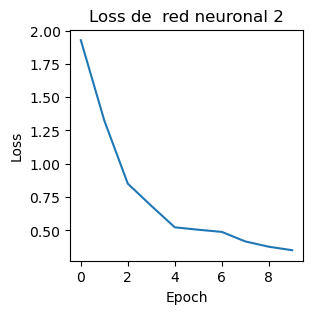

In [ ]:
plot_loss(red_2,"2")

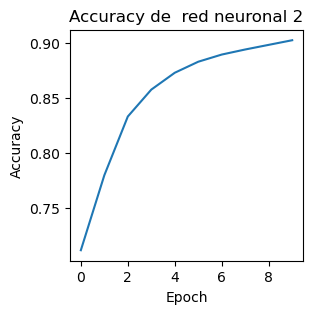

In [ ]:
plot_acc(red_2,"2")

**Red neuronal con tres capas ocultas**

In [ ]:
red_3 = train(num_epochs, model_3, learning_rate)

Epoch: 1, Loss: 2.228894 , Accuracy : 0.502800
Epoch: 2, Loss: 2.091266 , Accuracy : 0.664200
Epoch: 3, Loss: 1.811893 , Accuracy : 0.704700
Epoch: 4, Loss: 1.358809 , Accuracy : 0.752600
Epoch: 5, Loss: 0.963619 , Accuracy : 0.802600
Epoch: 6, Loss: 0.720997 , Accuracy : 0.832300
Epoch: 7, Loss: 0.587380 , Accuracy : 0.849900
Epoch: 8, Loss: 0.548343 , Accuracy : 0.865200
Epoch: 9, Loss: 0.487353 , Accuracy : 0.878100
Epoch: 10, Loss: 0.434686 , Accuracy : 0.884000


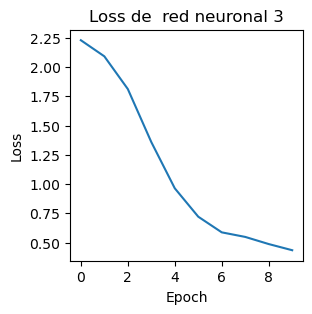

In [ ]:
plot_loss(red_3,"3")

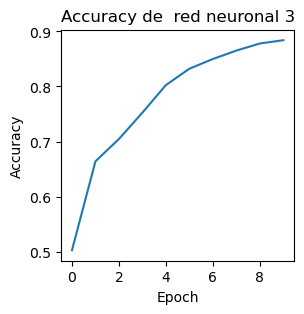

In [ ]:
plot_acc(red_3,"3")

### Comparación de los modelos

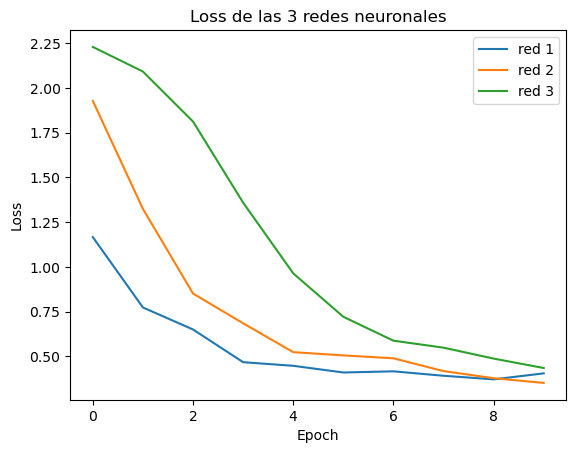

In [ ]:
plt.plot(red_1['Epoch'],red_1['Loss'],label='red 1')
plt.plot(red_2['Epoch'],red_2['Loss'],label='red 2')
plt.plot(red_3['Epoch'],red_3['Loss'],label='red 3')
plt.title("Loss de las 3 redes neuronales")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

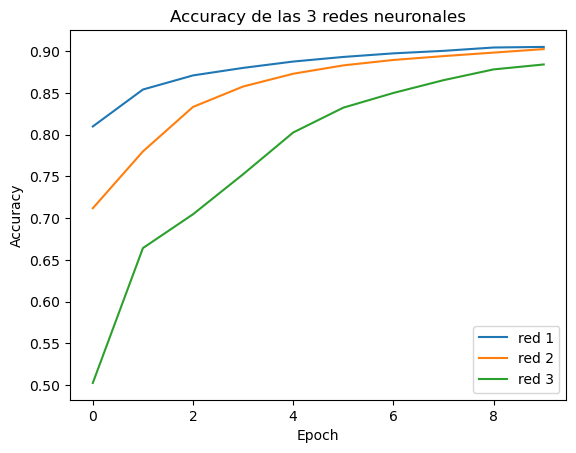

In [ ]:
plt.plot(red_1['Epoch'],red_1['Accuracy'],label='red 1')
plt.plot(red_2['Epoch'],red_2['Accuracy'],label='red 2')
plt.plot(red_3['Epoch'],red_3['Accuracy'],label='red 3')
plt.title("Accuracy de las 3 redes neuronales")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Conclusiones

Podemos observar de los resultados que las tres redes neuronales de una, dos y tres capas, respectivamente, tienen un mejor rendimiento ante el algoritmo de regresión logística, lo cual era un poco predecible por el tipo de problema que tenemos, ya que al trabajar con redes neuronales tenemos mayor flexibilidad de trabajar con problemas más complejos, sin embargo, al utilizar los parámetros que nosotros definimos, podemos observar que entre más capas ocultas agregamos el rendimiento de nuestro algoritmo disminuye, sería interesante optimizar los parámetros y ver en que casos ocurre este comportamiento, o si se puede generalizar a un cierto número de unidades de las capas ocultas.